# Histogramas en Pyhton

## Histograma en Python puro

In [1]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [2]:
def count_elements(seq) -> dict:
    """
        Funcion que cuenta las frecuencias
        de aparición de cada elemento de la secuencias,creando
        un diccionario como si fuera una tabla de frecuencias
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0) + 1
    return hist

In [3]:
fAbs = count_elements(x)
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [4]:
from collections import Counter

In [5]:
fAbs2 = Counter(x)
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [6]:
def ascii_histogram(seq) -> None:
    """
        Un histograma de frecuencias absolutas
        colocado en horizontal y con caracteres ASCII
    """
    
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [7]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [8]:
import random
random.seed(2019)

In [9]:
vals = [1,2,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
freqs = (random.randint(5,20) for _ in vals)

In [10]:
data = []
for k,v in zip(vals,freqs):
    data.extend([k]*v)


In [11]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++
   11 ++++++++++++++++++
   12 ++++++++++++
   13 ++++++++++++++++++
   14 +++++++++++++++++++
   15 +++++++
   16 +++++++++++++++
   17 ++++++
   18 ++++++++++++++++
   19 ++++++++++++++++
   20 +++++++++++++++


## Histogramas con Numpy

In [13]:
import numpy as np

In [15]:
np.random.seed(2019)

In [16]:
np.set_printoptions(precision=3)

In [17]:
x = np.random.laplace(loc=10, scale=3, size=1000)

In [18]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [19]:
hist, bin_edges = np.histogram(x)

In [20]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [21]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [22]:
hist.size, bin_edges.size

(10, 11)

In [23]:
min_edge = x.min()
max_edge = x.max()

In [24]:
n_bins = 10
bin_edges = np.linspace(start = min_edge, stop=max_edge, num=n_bins+1, endpoint=True)

In [26]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

# Visualización de histogramas con matplotlib y Pandas

In [30]:
import matplotlib.pyplot as plt

In [28]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3, size=1000)

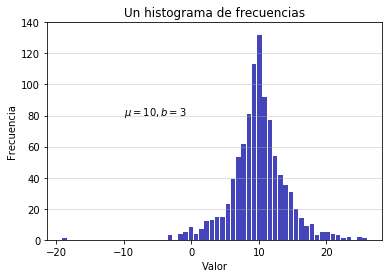

In [39]:
n, bins, patches = plt.hist(x = x, bins='auto', color='#0505a5', alpha=0.75, rwidth=0.85)
plt.grid(axis ='y', alpha=0.5)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title("Un histograma de frecuencias")
plt.text(-10,80, r'$\mu = 10, b = 3$')
plt.ylim(ymax=np.ceil(n.max()/10)*10 if n.max()%10 else n.max()+10)
plt.show()

In [36]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [37]:
bins

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [38]:
patches

<a list of 58 Patch objects>

In [40]:
import pandas as pd

In [41]:
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size=size))

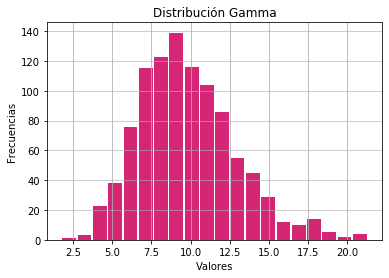

In [44]:
data.hist(grid = True, bins=20, rwidth=0.9, color='#d52675')
plt.title("Distribución Gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis = "y", alpha= 0.75)

In [45]:
data = pd.read_csv('../../data/medals.csv')

In [46]:
data.head()

,Unnamed: 0,Year,City,Sport,Discipline,NOC,Event,Event.gender,Medal
0,1,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,2,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,3,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,4,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,5,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe27aaafbd0>,
      dtype=object)

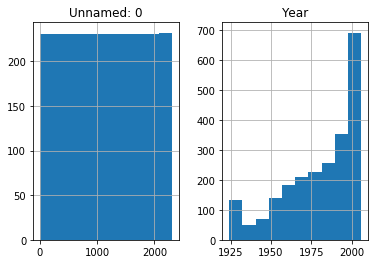

In [47]:
data.hist()

# Funciones de densidad y de probabilidad

In [48]:
mu = 10,20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc = mu, scale = sigma, size=(1000,2)), columns=['x1','x2'])

In [49]:
dist.agg(['min','max','mean','std']).round(decimals=2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


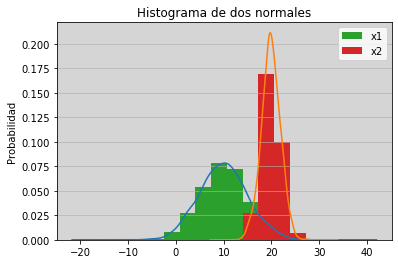

In [55]:
fig, ax = plt.subplots()
dist.plot.kde(ax = ax,legend = False, title = 'Histograma de dos normales')
dist.plot.hist(density = True, ax = ax)
ax.set_ylabel('Probabilidad')
ax.grid(axis='y',alpha = 0.75)
ax.set_facecolor('#d5d5d5')

In [56]:
from scipy import stats

In [57]:
dist = stats.norm() #distribucion normal teorica N(0,1)

In [58]:
sample = dist.rvs(size = 1000)

In [59]:
x =  np.linspace(start = stats.norm.ppf(0.01), stop=stats.norm.ppf(0.99), num = 250)

In [60]:
gkde = stats.gaussian_kde(dataset=sample)

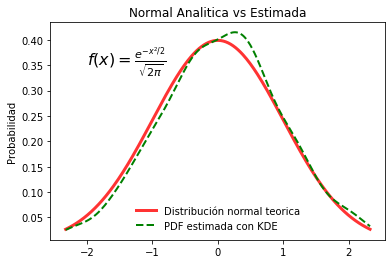

In [68]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle='solid',c='red',lw=3, alpha=0.8, label="Distribución normal teorica")
ax.plot(x, gkde.evaluate(x), linestyle='dashed', c='green', lw=2, label='PDF estimada con KDE')
ax.legend(loc='best', frameon=False)
ax.set_title("Normal Analitica vs Estimada")
ax.set_ylabel('Probabilidad')
ax.text(-2.,0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$', fontsize= 16)
plt.show()

# Histogramas con Seaborn

In [69]:
import seaborn as sb

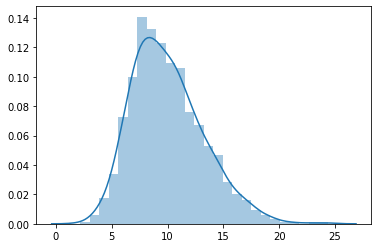

In [71]:
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size=size))
sb.distplot(data)

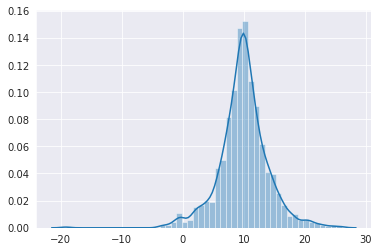

In [72]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3, size=1000)
sb.set_style('darkgrid')
sb.distplot(x)

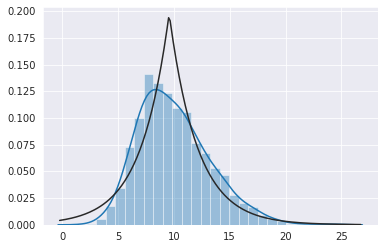

In [73]:
sb.distplot(data, fit = stats.laplace)

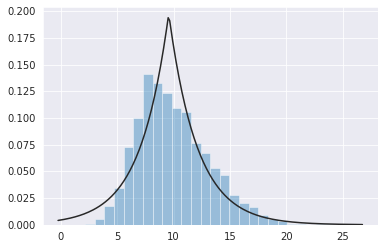

In [75]:
sb.distplot(data, fit = stats.laplace, kde=False)

# Otras formas

In [76]:
data2 = np.random.choice(np.arange(10), size = 10000, p = np.linspace(1,11,10)/60)

In [77]:
s = pd.Series(data2)

In [78]:
s.value_counts()

9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [79]:
s.value_counts(normalize=True)

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

In [82]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,19,20,40,51,56])
bins = (0,10,15,18,21,np.inf)
labels = ('infancia','preadolecencia','adolecencia','universitario','adulto')
groups = pd.cut(ages, bins = bins, labels= labels)

In [83]:
groups

0           infancia
1           infancia
2           infancia
3           infancia
4           infancia
5           infancia
6           infancia
7           infancia
8     preadolecencia
9     preadolecencia
10       adolecencia
11     universitario
12     universitario
13            adulto
14            adulto
15            adulto
dtype: category
Categories (5, object): [infancia < preadolecencia < adolecencia < universitario < adulto]

In [84]:
groups.value_counts()

infancia          8
adulto            3
universitario     2
preadolecencia    2
adolecencia       1
dtype: int64

In [86]:
pd.concat((ages,groups), axis=1).rename(columns={0:'age',1:'group'})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolecencia
9,15,preadolecencia
